In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# **Tổng quan bộ dữ liệu**









In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Tuan3198263/CT312/main/Car_Insurance_datasets.xlsx'
df = pd.read_excel(url)

df.head()


,ID,Name,Work,AGE,SEX,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,...,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,N1,CTU,65+,female,majority,0-9y,high school,upper class,0.629027,...,after 2015,0.0,1.0,10238.0,12000.0,sedan,0.0,0,0,0
1,750365,N2,CTU,16-25,male,majority,0-9y,none,poverty,0.357757,...,before 2015,0.0,0.0,10238.0,16000.0,sedan,0.0,0,0,1
2,199901,N3,CTU,16-25,female,majority,0-9y,high school,working class,0.493146,...,before 2015,0.0,0.0,10238.0,11000.0,sedan,0.0,0,0,0
3,478866,N4,CTU,16-25,male,majority,0-9y,university,working class,0.206013,...,before 2015,0.0,1.0,32765.0,11000.0,sedan,0.0,0,0,0
4,731664,N5,CTU,26-39,male,majority,10-19y,none,working class,0.388366,...,before 2015,0.0,0.0,32765.0,12000.0,sedan,2.0,0,1,1


In [3]:
df.shape[0]

10000

In [4]:
#thong tin datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   Name                 10000 non-null  object 
 2   Work                 10000 non-null  object 
 3   AGE                  10000 non-null  object 
 4   SEX                  9999 non-null   object 
 5   RACE                 9998 non-null   object 
 6   DRIVING_EXPERIENCE   9998 non-null   object 
 7   EDUCATION            9998 non-null   object 
 8   INCOME               9998 non-null   object 
 9   CREDIT_SCORE         9016 non-null   float64
 10  SALARY               24 non-null     float64
 11  VEHICLE_OWNERSHIP    9998 non-null   float64
 12  VEHICLE_YEAR         9998 non-null   object 
 13  MARRIED              9999 non-null   float64
 14  CHILDREN             9999 non-null   float64
 15  POSTAL_CODE          9999 non-null   

In [5]:
df.isna().sum() #Kiem tra gia tri bi thieu

,0
ID,0
Name,0
Work,0
AGE,0
SEX,1
RACE,2
DRIVING_EXPERIENCE,2
EDUCATION,2
INCOME,2
CREDIT_SCORE,984


In [6]:
df.duplicated().sum() #Kiem tra trung lap


0

In [7]:
df.describe()


,ID,CREDIT_SCORE,SALARY,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9016.000000,24.000000,9998.000000,9999.000000,9999.000000,9999.000000,9042.000000,9999.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515822,515575.875000,0.696939,0.499250,0.788779,19857.324032,11697.190887,1.483048,0.23920,1.056300,0.313300
std,290030.768758,0.137702,309633.453413,0.459604,0.510908,10.004329,18902.758202,2818.533882,2.242029,0.55499,1.652454,0.463858
min,101.000000,0.053358,217.000000,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417152,267029.500000,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525068,501073.000000,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618330,782163.000000,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,980181.000000,1.000000,11.000000,1000.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [8]:
#Xóa các cột không cần thiết
df = df.drop(['ID','Name', 'Work', 'SALARY'], axis=1)
df.head()

,AGE,SEX,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238.0,12000.0,sedan,0.0,0,0,0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238.0,16000.0,sedan,0.0,0,0,1
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238.0,11000.0,sedan,0.0,0,0,0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765.0,11000.0,sedan,0.0,0,0,0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2.0,0,1,1


# **Trực quan hóa dữ liệu**

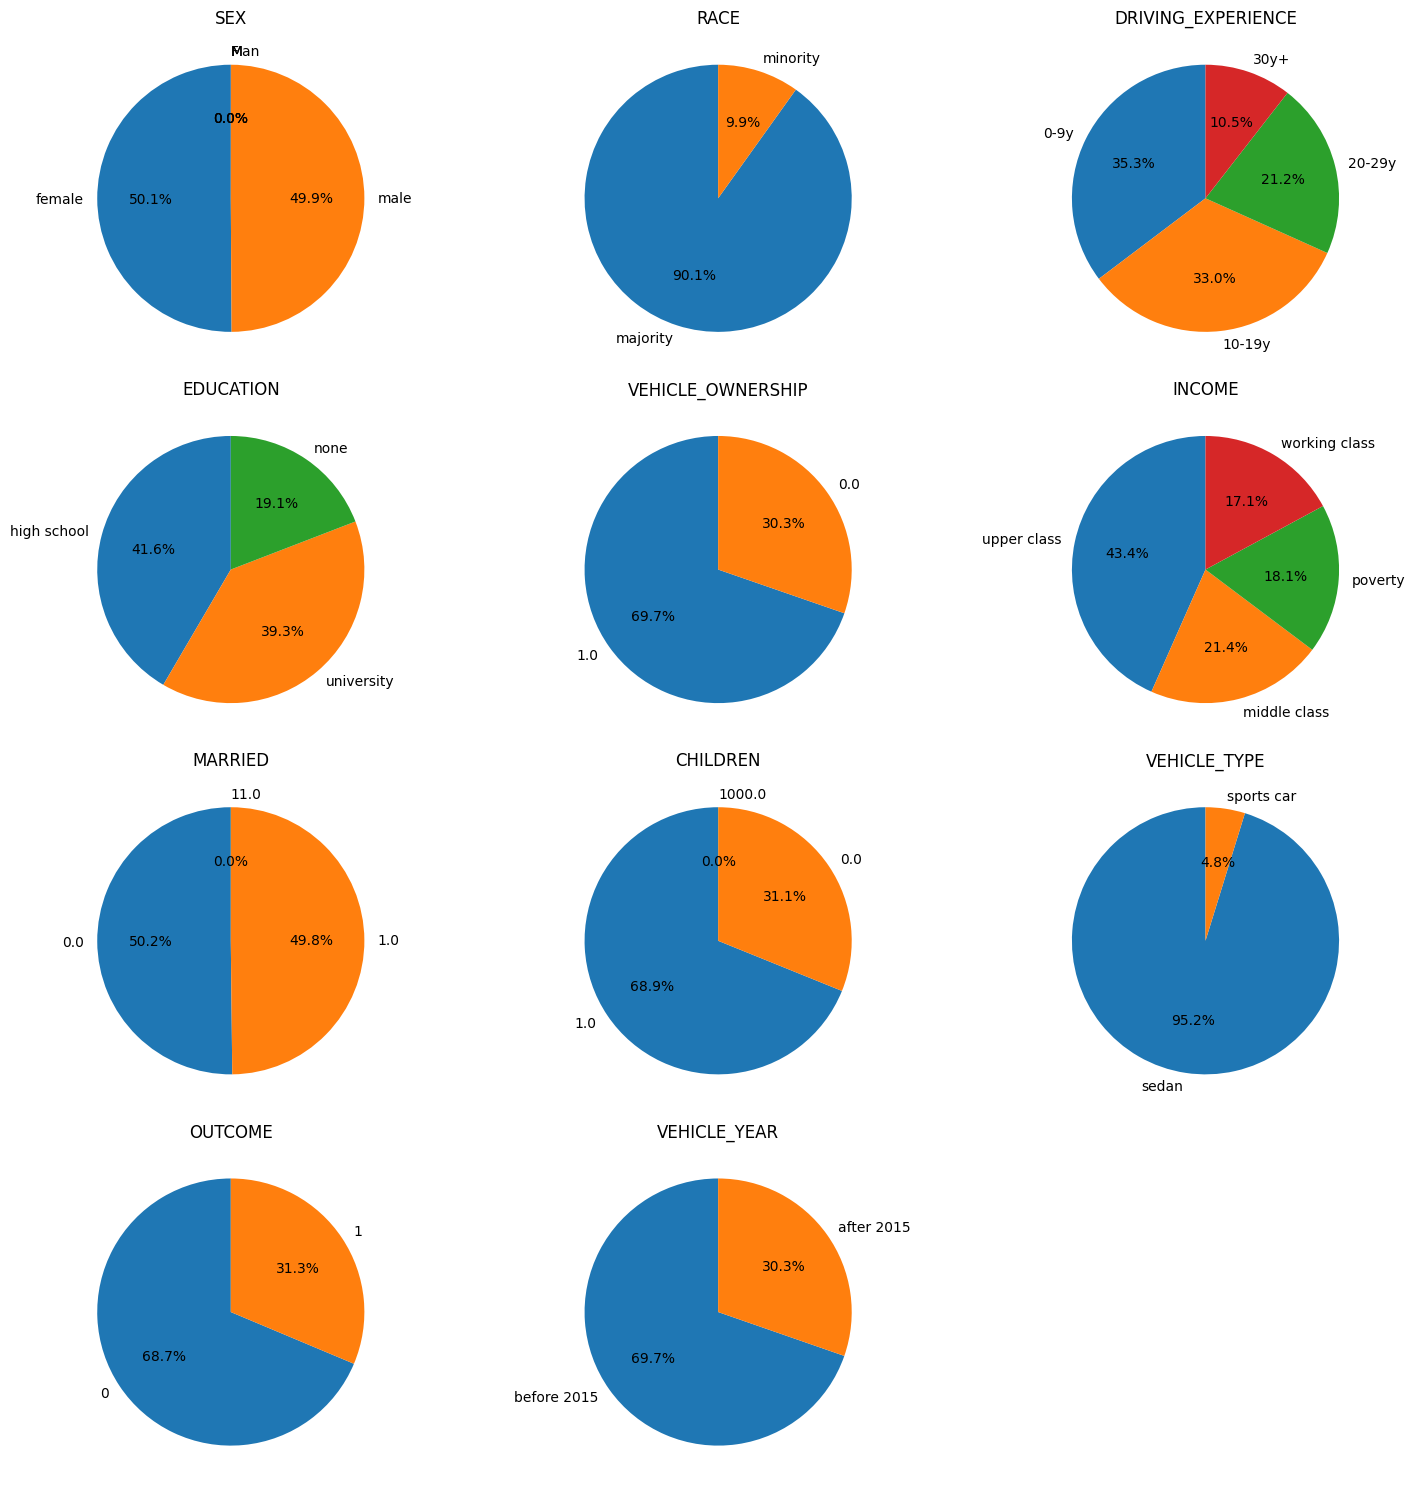

In [9]:
import matplotlib.pyplot as plt

# Danh sách các cột rời rạc
categorical_columns = [
    'SEX', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION',
    'VEHICLE_OWNERSHIP', 'INCOME', 'MARRIED', 'CHILDREN',
    'VEHICLE_TYPE', 'OUTCOME', 'VEHICLE_YEAR'
]

# Thiết lập kích thước của biểu đồ
plt.figure(figsize=(15, 15))

# Tạo một biểu đồ tròn cho mỗi cột
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)  # Sắp xếp biểu đồ theo lưới 4x3
    values = df[col].value_counts()
    plt.pie(values, labels=values.index, autopct='%1.1f%%', startangle=90)
    plt.title(col)

plt.tight_layout()  # Điều chỉnh khoảng cách giữa các biểu đồ
plt.show()


<ipython-input-10-3a510555f3e7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette='viridis')


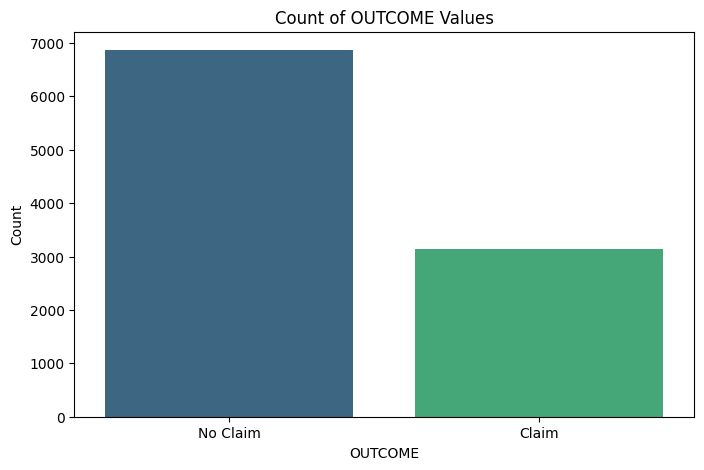

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Đếm số lượng giá trị 0 và 1 trong cột OUTCOME
outcome_counts = df['OUTCOME'].value_counts()

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(8, 5))

# Vẽ biểu đồ cột
sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette='viridis')

# Thiết lập tiêu đề và nhãn
plt.title('Count of OUTCOME Values')
plt.xlabel('OUTCOME')
plt.ylabel('Count')

# Hiển thị biểu đồ
plt.xticks([0, 1], ['No Claim', 'Claim'])  # Đổi nhãn trục x cho rõ ràng hơn
plt.show()


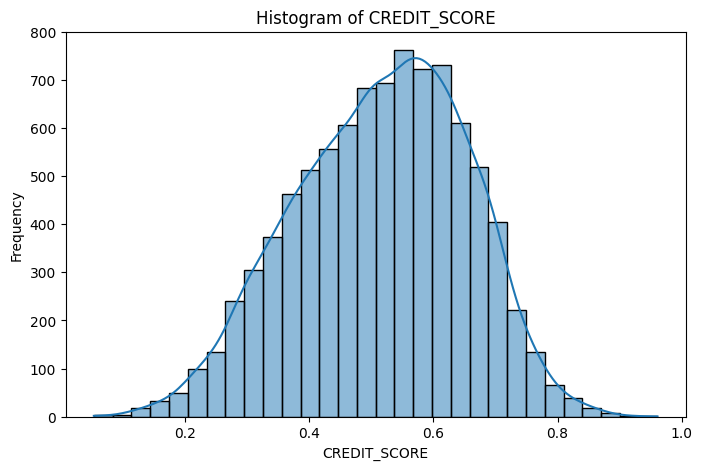

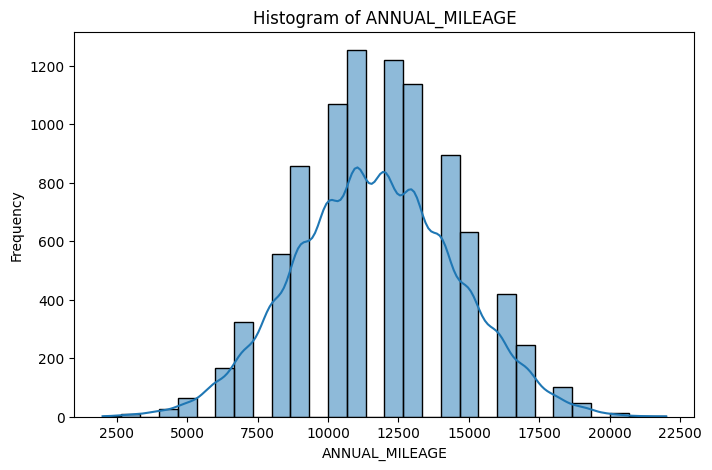

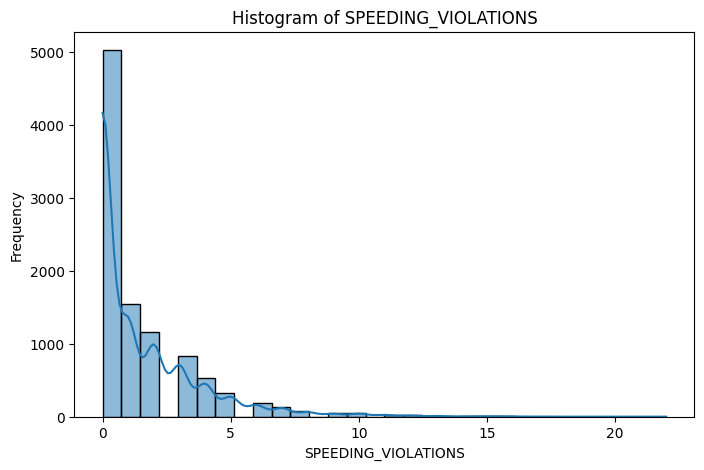

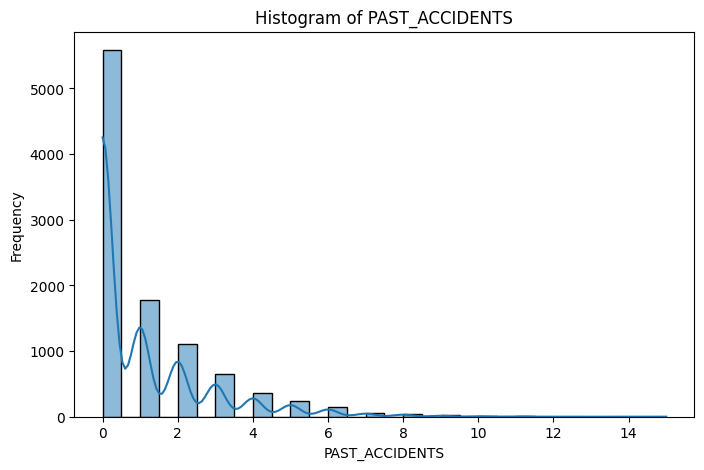

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Danh sách các cột liên tục
continuous_columns = ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'PAST_ACCIDENTS']

# Vẽ histogram cho từng cột
for col in continuous_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30)  # Vẽ histogram cho cột mà không phân theo outcome
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


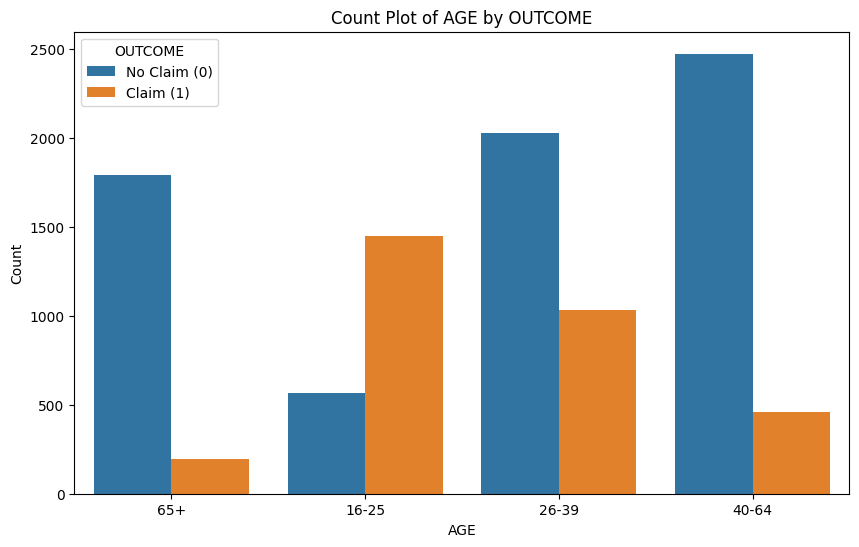

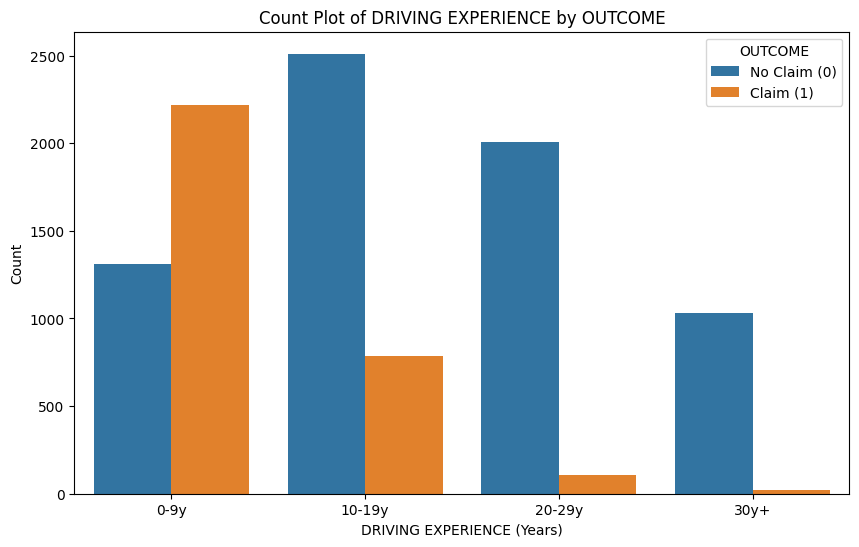

In [12]:
# Vẽ count plot cho AGE theo OUTCOME
plt.figure(figsize=(10, 6))
sns.countplot(x='AGE', hue='OUTCOME', data=df)
plt.title('Count Plot of AGE by OUTCOME')
plt.xlabel('AGE')
plt.ylabel('Count')
plt.legend(title='OUTCOME', labels=['No Claim (0)', 'Claim (1)'])
plt.show()



# Vẽ count plot cho DRIVING_EXPERIENCE theo OUTCOME
plt.figure(figsize=(10, 6))
sns.countplot(x='DRIVING_EXPERIENCE', hue='OUTCOME', data=df)
plt.title('Count Plot of DRIVING EXPERIENCE by OUTCOME')
plt.xlabel('DRIVING EXPERIENCE (Years)')
plt.ylabel('Count')
plt.legend(title='OUTCOME', labels=['No Claim (0)', 'Claim (1)'])
plt.show()


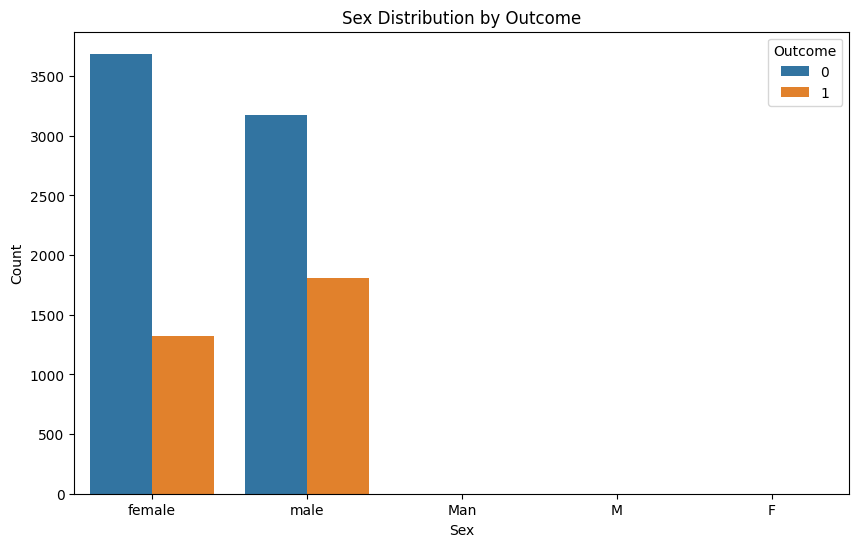

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Biểu đồ cột cho SEX theo OUTCOME
plt.figure(figsize=(10, 6))
sns.countplot(x='SEX', hue='OUTCOME', data=df)
plt.title('Sex Distribution by Outcome')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Outcome', loc='upper right')
plt.show()


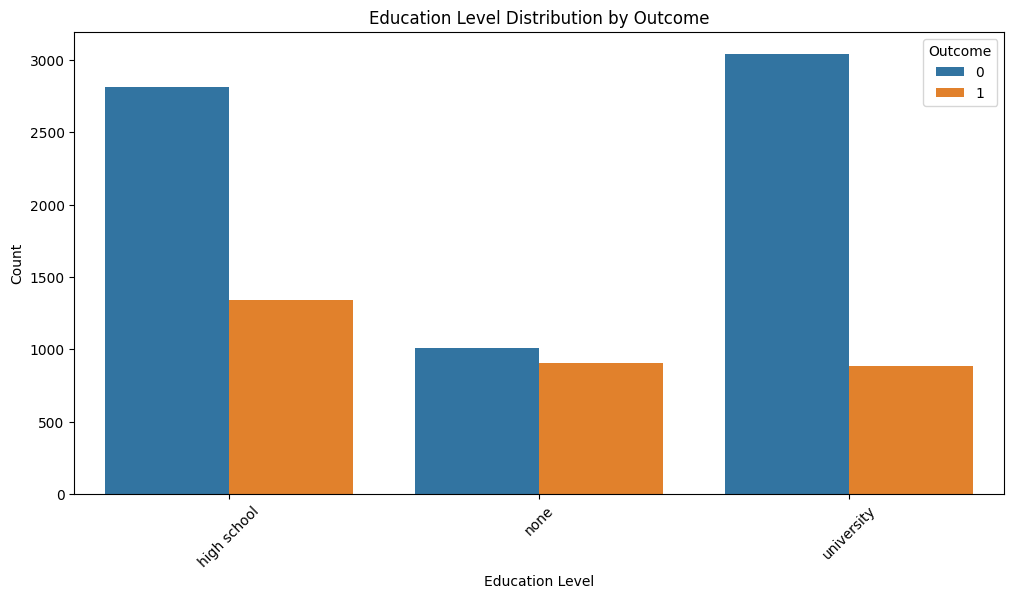

In [14]:
# Biểu đồ cột cho Education  theo OUTCOME
plt.figure(figsize=(12, 6))
sns.countplot(x='EDUCATION', hue='OUTCOME', data=df)
plt.title('Education Level Distribution by Outcome')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Outcome', loc='upper right')
plt.show()


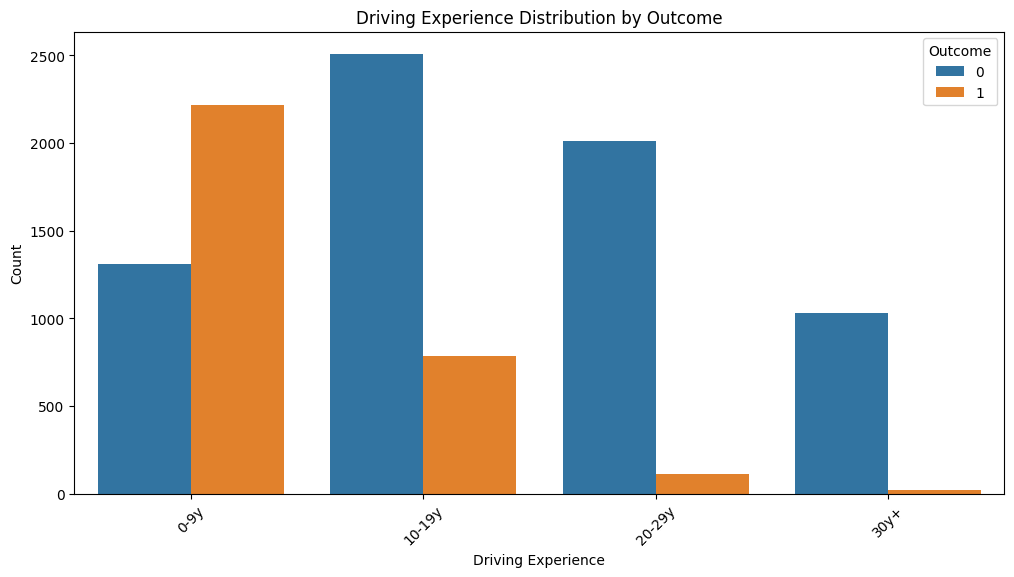

In [15]:
# Biểu đồ cột cho Driving Experience theo OUTCOME
plt.figure(figsize=(12, 6))
sns.countplot(x='DRIVING_EXPERIENCE', hue='OUTCOME', data=df)
plt.title('Driving Experience Distribution by Outcome')
plt.xlabel('Driving Experience')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Outcome', loc='upper right')
plt.show()


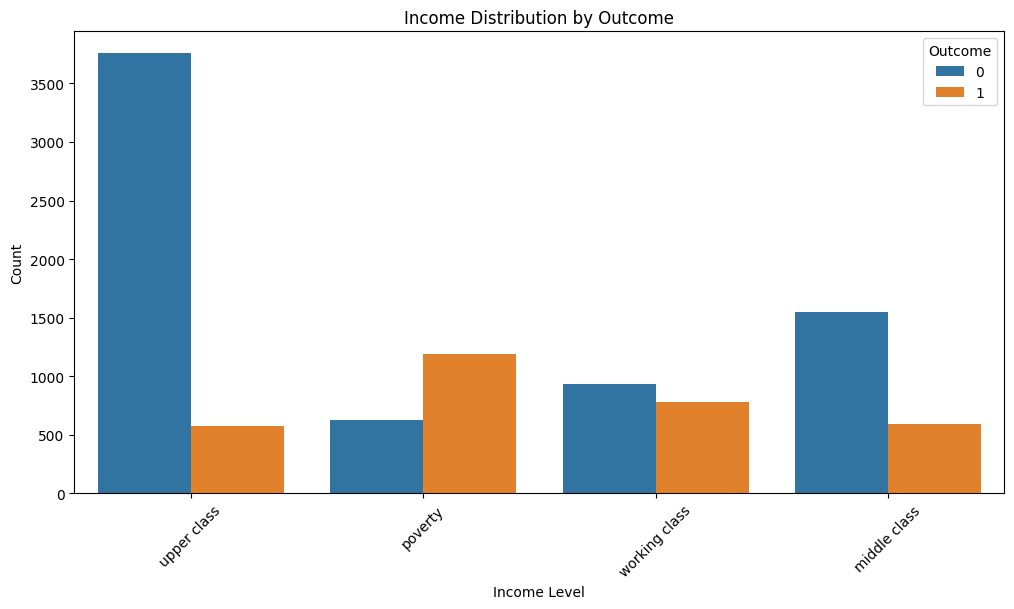

In [16]:
# Biểu đồ cột cho Income theo OUTCOME
plt.figure(figsize=(12, 6))
sns.countplot(x='INCOME', hue='OUTCOME', data=df)
plt.title('Income Distribution by Outcome')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Outcome', loc='upper right')
plt.show()


# Tiền xử lí dữ **liệu**

Xử lí các cột, hàng bị thiếu

Dùng Label Encoding xử lí các cột mang giá trị rời rạc, một số cột mang giá trị gây nhầm lẫn sẽ được xử lí trước khi mã hóa, các cột mang giá trị liên tục sẽ được giữ nguyên(sử dụng boxplot trực quan các cột này nhận thấy có giá trị gây nhiễu, tuy nhiên sẽ giữ các giá trị này để giữ tính toàn vẹn của datasets)

In [17]:
# Điền các giá trị thiếu cho cột số bằng giá trị trung bình (mean)
df['CREDIT_SCORE'] = df['CREDIT_SCORE'].fillna(df['CREDIT_SCORE'].mean())
df['ANNUAL_MILEAGE'] = df['ANNUAL_MILEAGE'].fillna(df['ANNUAL_MILEAGE'].mean())

# Điền các giá trị thiếu cho các cột phân loại bằng giá trị thường gặp nhất (mode)
columns_mode = ['SEX', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
                'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN',
                'POSTAL_CODE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS']

for column in columns_mode:
    df[column] = df[column].fillna(df[column].mode()[0])


In [18]:
# Kiểm tra lại để đảm bảo không còn giá trị thiếu
df.isna().sum()

,0
AGE,0
SEX,0
RACE,0
DRIVING_EXPERIENCE,0
EDUCATION,0
INCOME,0
CREDIT_SCORE,0
VEHICLE_OWNERSHIP,0
VEHICLE_YEAR,0
MARRIED,0


In [19]:
df.head()

,AGE,SEX,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238.0,12000.0,sedan,0.0,0,0,0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238.0,16000.0,sedan,0.0,0,0,1
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238.0,11000.0,sedan,0.0,0,0,0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765.0,11000.0,sedan,0.0,0,0,0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2.0,0,1,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  object 
 1   SEX                  10000 non-null  object 
 2   RACE                 10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   CREDIT_SCORE         10000 non-null  float64
 7   VEHICLE_OWNERSHIP    10000 non-null  float64
 8   VEHICLE_YEAR         10000 non-null  object 
 9   MARRIED              10000 non-null  float64
 10  CHILDREN             10000 non-null  float64
 11  POSTAL_CODE          10000 non-null  float64
 12  ANNUAL_MILEAGE       10000 non-null  float64
 13  VEHICLE_TYPE         10000 non-null  object 
 14  SPEEDING_VIOLATIONS  10000 non-null  float64
 15  DUIS                 10000 non-null  

In [21]:
df['OUTCOME'].value_counts()

,count
OUTCOME,
0,6867
1,3133


In [22]:
df['AGE'].value_counts()

,count
AGE,
26-39,3063
40-64,2931
16-25,2016
65+,1990


In [23]:
#Xử lí cột age
df['AGE'] = df['AGE'].replace({
    '16-25': 0,
    '26-39': 1,
    '40-64': 2,
    '65+': 3
}).astype(int)




<ipython-input-23-3693d57b0b10>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['AGE'] = df['AGE'].replace({


,AGE,SEX,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238.0,12000.0,sedan,0.0,0,0,0
1,0,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238.0,16000.0,sedan,0.0,0,0,1
2,0,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238.0,11000.0,sedan,0.0,0,0,0
3,0,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765.0,11000.0,sedan,0.0,0,0,0
4,1,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2.0,0,1,1


In [24]:
df['SEX'].value_counts()

,count
SEX,
female,5010
male,4987
Man,1
M,1
F,1


In [25]:
# Xử lí cột SEX

df['SEX'] = df['SEX'].replace({
    'female': 'female',
    'male': 'male',
    'Man': 'male',  # Chuyển 'Man' thành 'male'
    'M': 'male',    # Chuyển 'M' thành 'male'
    'F': 'female'   # Chuyển 'F' thành 'female'
})



In [26]:
#Mã hóa cột SEX
df['SEX'] = df['SEX'].map({'female': 0, 'male': 1})


In [27]:
df['RACE'].value_counts()

,count
RACE,
majority,9012
minority,988


In [28]:
#Xử lí cột RACE
df['RACE'] = df['RACE'].map({'majority': 0, 'minority': 1})



In [29]:
df['DRIVING_EXPERIENCE'].value_counts()

,count
DRIVING_EXPERIENCE,
0-9y,3531
10-19y,3298
20-29y,2119
30y+,1052


In [30]:
#Mã hóa cột driving experince
df['DRIVING_EXPERIENCE'] = df['DRIVING_EXPERIENCE'].replace({
    '0-9y': 0,
    '10-19y': 1,
    '20-29y': 2,
    '30y+': 3
})


<ipython-input-30-93113aa760c7>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['DRIVING_EXPERIENCE'] = df['DRIVING_EXPERIENCE'].replace({


In [31]:
df['EDUCATION'].value_counts()

,count
EDUCATION,
high school,4158
university,3928
none,1914


In [32]:
# Mã hóa cột EDUCATION

# Đảm bảo cột EDUCATION là chuỗi
df['EDUCATION'] = df['EDUCATION'].astype(str)


df['EDUCATION'] = df['EDUCATION'].replace({
    'high school': 0,
    'university': 1,
    'none': 2
}).astype(int)  # Chuyển đổi thành kiểu int

<ipython-input-32-d4863f597a67>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['EDUCATION'] = df['EDUCATION'].replace({


In [33]:
df['INCOME'].value_counts()

,count
INCOME,
upper class,4338
middle class,2137
poverty,1814
working class,1711


In [34]:
#Mã hóa cột Income
df['INCOME'] = df['INCOME'].replace({
    'poverty': 0,
    'working class': 1,
    'middle class': 2,
    'upper class': 3
})


<ipython-input-34-521d5d5a3008>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['INCOME'] = df['INCOME'].replace({


In [35]:
df['CREDIT_SCORE'].value_counts()

,count
CREDIT_SCORE,
0.515822,984
0.594531,1
0.396540,1
0.578306,1
0.633275,1
...,...
0.275580,1
0.309272,1
0.847325,1


In [36]:
df['VEHICLE_OWNERSHIP'].value_counts()

,count
VEHICLE_OWNERSHIP,
1.0,6970
0.0,3030


In [37]:
df['VEHICLE_YEAR'].value_counts()

,count
VEHICLE_YEAR,
before 2015,6968
after 2015,3032


In [38]:
#Mã hóa cột Vihice_year
df['VEHICLE_YEAR'] = df['VEHICLE_YEAR'].replace({
    'before 2015': 0,
    'after 2015': 1
})


<ipython-input-38-c25fc8b732fd>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['VEHICLE_YEAR'] = df['VEHICLE_YEAR'].replace({


In [39]:
df['MARRIED'].value_counts()

,count
MARRIED,
0.0,5018
1.0,4981
11.0,1


In [40]:
# Xử lí cột married
# Loại bỏ các hàng có giá trị MARRIED là 11.0
df = df[df['MARRIED'] != 11.0]


In [41]:
df['CHILDREN'].value_counts()

,count
CHILDREN,
1.0,6887
0.0,3111
1000.0,1


In [42]:
#Xu li cot Chilred
# Loại bỏ các hàng có giá trị CHILDREN là 1000.0
df = df[df['CHILDREN'] != 1000.0]


In [43]:
df['POSTAL_CODE'].value_counts()

,count
POSTAL_CODE,
10238.0,6940
32765.0,2456
92101.0,482
21217.0,120


In [44]:
# Xử lí cột postal_code, đây là cột mang tính phân loại nên chuyển sang 0,1,2 cho đơn giản
df['POSTAL_CODE'] = df['POSTAL_CODE'].replace({
    10238: 0,
    32765: 1,
    92101: 2,
    21217: 3
})


In [45]:
df['ANNUAL_MILEAGE'].value_counts() #Số dăm xe di chuyển trong 1 năm

,count
ANNUAL_MILEAGE,
11000.000000,1253
12000.000000,1217
13000.000000,1137
10000.000000,1070
11697.190887,958
14000.000000,894
9000.000000,856
15000.000000,632
8000.000000,557


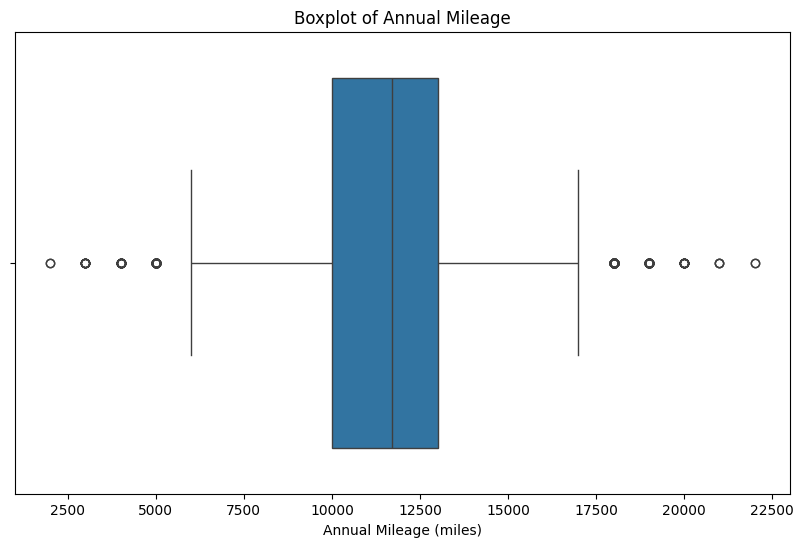

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ biểu đồ boxplot cho ANNUAL_MILEAGE
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ANNUAL_MILEAGE'])
plt.title('Boxplot of Annual Mileage')
plt.xlabel('Annual Mileage (miles)')
plt.show()


In [ ]:
# Loại bỏ ngoại lai trong cột ANNUAL_MILEAGE
#df = df[(df['ANNUAL_MILEAGE'] >= 5000) & (df['ANNUAL_MILEAGE'] <= 17500)]
#Không xóa


In [47]:
df['VEHICLE_TYPE'].value_counts()

,count
VEHICLE_TYPE,
sedan,9522
sports car,476


In [48]:
#Mã hóa vihecie _type
# Ánh xạ VEHICLE_TYPE sang 0 và 1
df['VEHICLE_TYPE'] = df['VEHICLE_TYPE'].replace({
    'sedan': 0,
    'sports car': 1
})


<ipython-input-48-33bebadcd8a1>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['VEHICLE_TYPE'] = df['VEHICLE_TYPE'].replace({


In [49]:
df['SPEEDING_VIOLATIONS'].value_counts() #Số lượng vi phạm tốc độ

,count
SPEEDING_VIOLATIONS,
0.0,5028
1.0,1544
2.0,1160
3.0,830
4.0,530
5.0,319
6.0,187
7.0,140
8.0,75


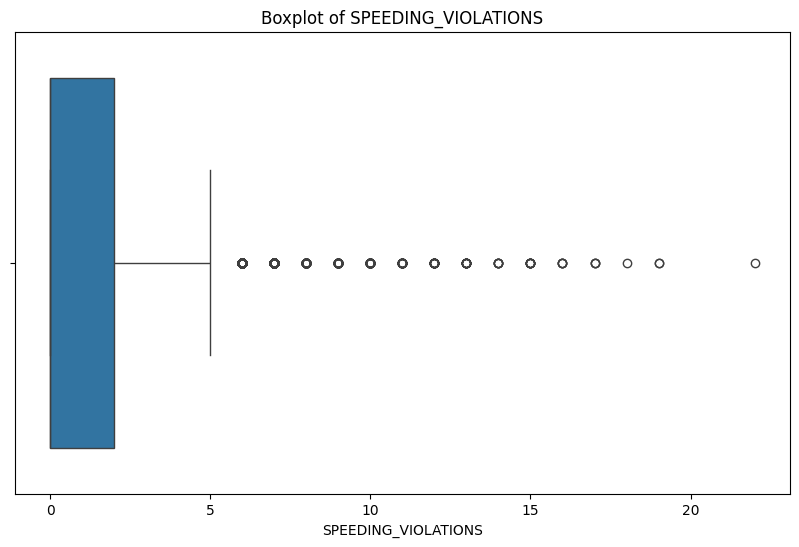

In [50]:


# Vẽ boxplot cho cột SPEEDING_VIOLATIONS
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['SPEEDING_VIOLATIONS'])
plt.title('Boxplot of SPEEDING_VIOLATIONS')
plt.xlabel('SPEEDING_VIOLATIONS')
plt.show()


In [ ]:
# Lọc dữ liệu để giữ lại các giá trị trong khoảng từ 0 đến 15
#df = df[(df['SPEEDING_VIOLATIONS'] <= 5)]
#Không xóa


In [51]:
df['DUIS'].value_counts() #Số lương vi phạm lái xe khi say rượu

,count
DUIS,
0,8116
1,1470
2,331
3,68
4,10
5,2
6,1


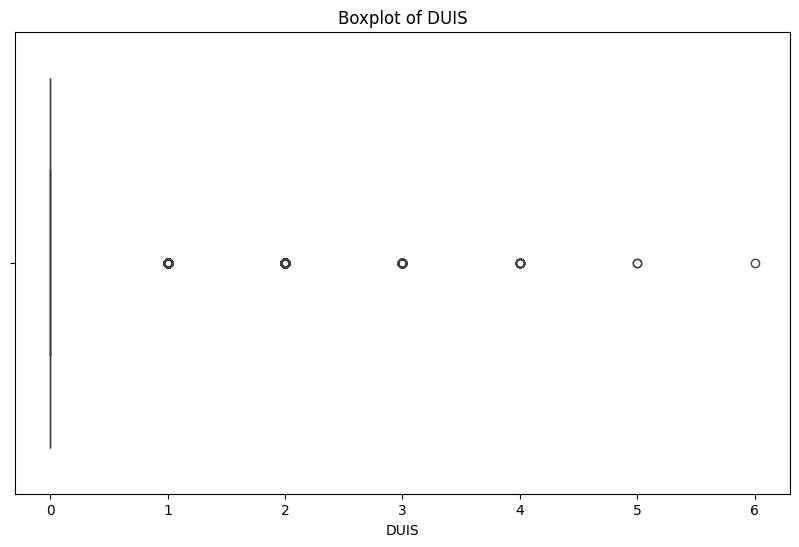

In [52]:


# Vẽ boxplot cho cột DUIS
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['DUIS'])
plt.title('Boxplot of DUIS')
plt.xlabel('DUIS')
plt.show()


In [ ]:
# Lọc dữ liệu để giữ lại các giá trị trong khoảng từ 0 đến 3
#df = df[(df['DUIS'] >= 0) & (df['DUIS'] <= 2)]
#Không xóa


In [53]:
df['PAST_ACCIDENTS'].value_counts() #Tai nạn xe

,count
PAST_ACCIDENTS,
0,5584
1,1782
2,1104
3,646
4,366
5,231
6,144
7,61
8,41


In [ ]:
# Lọc dữ liệu để giữ lại các giá trị trong khoảng từ 0 đến 12
#df = df[(df['PAST_ACCIDENTS'] >= 0) & (df['PAST_ACCIDENTS'] <= 5)]
#Không xóa


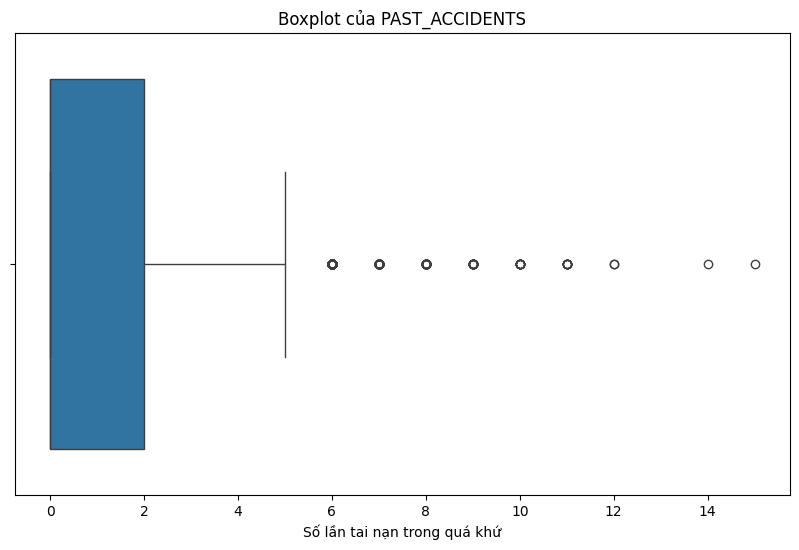

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo biểu đồ boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['PAST_ACCIDENTS'])
plt.title('Boxplot của PAST_ACCIDENTS')
plt.xlabel('Số lần tai nạn trong quá khứ')
plt.show()


In [55]:
df['OUTCOME'].value_counts()

,count
OUTCOME,
0,6865
1,3133


In [ ]:
#thong tin datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  9998 non-null   int64  
 1   SEX                  9998 non-null   int64  
 2   RACE                 9998 non-null   int64  
 3   DRIVING_EXPERIENCE   9998 non-null   int64  
 4   EDUCATION            9998 non-null   int64  
 5   INCOME               9998 non-null   int64  
 6   CREDIT_SCORE         9998 non-null   float64
 7   VEHICLE_OWNERSHIP    9998 non-null   float64
 8   VEHICLE_YEAR         9998 non-null   int64  
 9   MARRIED              9998 non-null   float64
 10  CHILDREN             9998 non-null   float64
 11  POSTAL_CODE          9998 non-null   float64
 12  ANNUAL_MILEAGE       9998 non-null   float64
 13  VEHICLE_TYPE         9998 non-null   int64  
 14  SPEEDING_VIOLATIONS  9998 non-null   float64
 15  DUIS                 9998 non-null   int64 

In [ ]:
df.shape[0]

9998

In [ ]:
print(df.isnull().sum())


AGE                    0
SEX                    0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64


In [ ]:
df.describe()

,AGE,SEX,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,1.489298,0.498800,0.098820,1.068914,0.775655,1.899780,0.515822,0.697039,0.303061,0.498200,0.688838,0.378076,11697.630413,0.047610,1.482396,0.239248,1.055911,0.313363
std,1.025256,0.500024,0.298435,0.990377,0.746289,1.149241,0.130764,0.459561,0.459604,0.500022,0.462992,0.635302,2679.968248,0.212949,2.241729,0.555035,1.652148,0.463884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053358,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.431508,0.000000,0.000000,0.000000,0.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.515822,1.000000,0.000000,0.000000,1.000000,0.000000,11697.190887,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,0.000000,2.000000,1.000000,3.000000,0.607617,1.000000,1.000000,1.000000,1.000000,1.000000,13000.000000,0.000000,2.000000,0.000000,2.000000,1.000000
max,3.000000,1.000000,1.000000,3.000000,2.000000,3.000000,0.960819,1.000000,1.000000,1.000000,1.000000,3.000000,22000.000000,1.000000,22.000000,6.000000,15.000000,1.000000


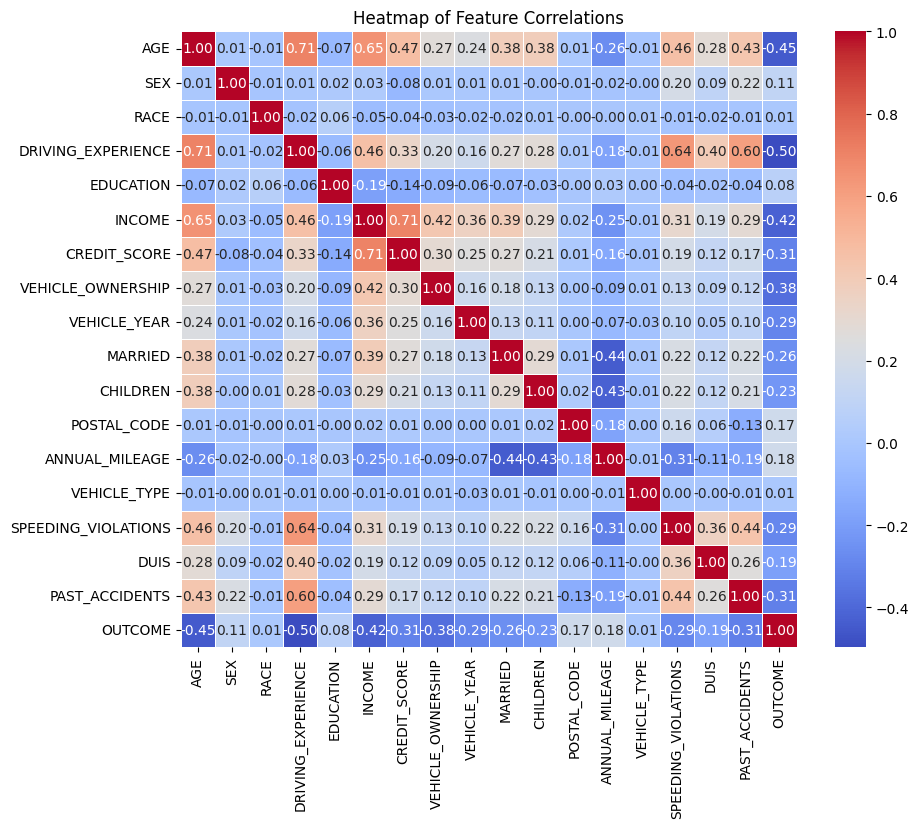

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính toán ma trận tương quan giữa các cột số trong dataset
correlation_matrix = df.corr()

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(10, 8))

# Vẽ biểu đồ heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)

# Thiết lập tiêu đề cho biểu đồ
plt.title("Heatmap of Feature Correlations")
plt.show()


In [ ]:
# Xuất ra file CSV
df.to_csv('car_insurance_data.csv', index=False)


Thử với các model